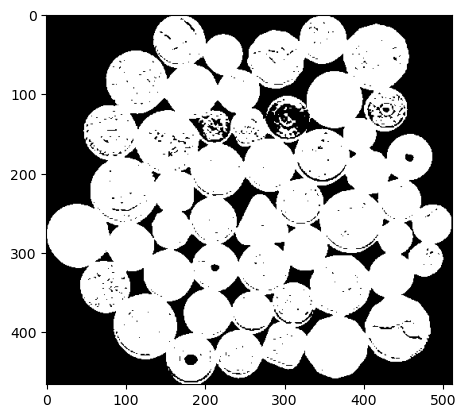

In [2]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
img = cv.imread(r"C:\Users\user\Desktop\master\DIP\project5\coins.jpg")
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
ret, thresh = cv.threshold(gray,0,255,cv.THRESH_BINARY_INV+cv.THRESH_OTSU)
plt.imshow(thresh,cmap="gray")
plt.show()

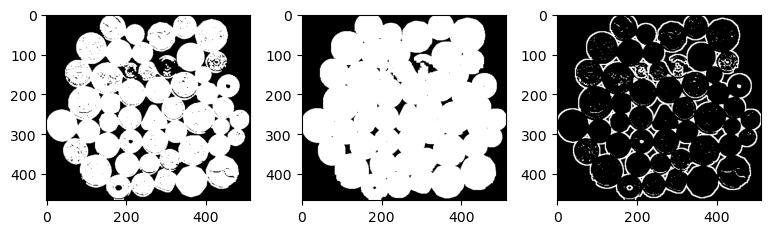

In [89]:
# noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv.morphologyEx(thresh,cv.MORPH_OPEN,kernel, iterations = 1)
# sure background area
sure_bg = cv.dilate(opening,kernel,iterations=3)
# Finding sure foreground area
dist_transform = cv.distanceTransform(opening,cv.DIST_L2,5)
ret, sure_fg = cv.threshold(dist_transform,0.01*dist_transform.max(),255,0)
# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv.subtract(sure_bg,sure_fg)

fig = plt.figure(figsize=(10, 6))
plt.subplot(247)
plt.imshow(sure_bg,cmap="gray")
plt.subplot(246)
plt.imshow(sure_fg,cmap="gray")
plt.subplot(248)
plt.imshow(unknown,cmap="gray")
plt.tight_layout()
plt.show()

In [90]:
# Marker labelling
ret, markers = cv.connectedComponents(sure_fg)
# Add one to all labels so that sure background is not 0, but 1
markers = markers+1
# Now, mark the region of unknown with zero
markers[unknown==255] = 0
#plt.imshow(markers)
#plt.show()

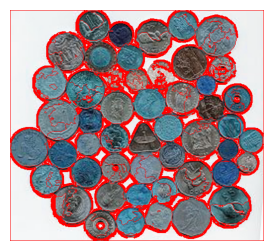

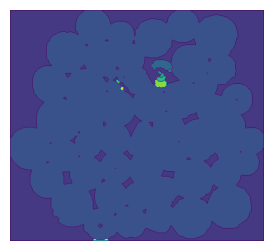

In [91]:
markers = cv.watershed(img,markers)
img[markers == -1] = [255,0,0]
fig = plt.figure(figsize=(5, 3))
plt.axis('off')
plt.imshow(img,cmap="gray")
plt.show()
fig = plt.figure(figsize=(5, 3))
plt.axis('off')
plt.imshow(markers)
plt.show()